In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install -r requirements.txt

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Pirma dalis

## Iš pridėto requirements.txt failo sukurti anacondos aplinką ir žemiau esančias užduotis vykdyti šioje aplinkoje. [0.25 taško]

## Parsisiųsti 2020 ir 2021 įmonių “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – balanso ataskaitos” ir “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – pelno (nuostolių) ataskaitos” duomenis. [0.25 taško]

In [3]:
url_blns_2021 = (
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2021.csv"
)
url_blns_2020 = (
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv"
)
url_plna_2021 = (
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2021.csv"
)
url_plna_2020 = (
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2020.csv"
)

df_blns_2021 = pd.read_csv(url_blns_2021)
df_blns_2020 = pd.read_csv(url_blns_2020)
df_plna_2021 = pd.read_csv(url_plna_2021)
df_plna_2020 = pd.read_csv(url_plna_2020)

<IPython.core.display.Javascript object>

In [4]:
# Merge Frames:

blns_merged = pd.concat([df_blns_2021, df_blns_2020])  # Merged blns of two years
plna_merged = pd.concat([df_plna_2021, df_plna_2020])  # Merged plna of two years

full_df = pd.concat([blns_merged, plna_merged])  # Full dataframe

df_of_2021 = df_blns_2021.merge(
    df_plna_2021,
    how="inner",
    left_on="obj_kodas",
    right_on="obj_kodas",
    left_index=False,
    right_index=False,
)  # Merged blns and plna dataframe by year 2021

df_of_2020 = df_blns_2020.merge(
    df_plna_2020,
    how="inner",
    left_on="obj_kodas",
    right_on="obj_kodas",
    left_index=False,
    right_index=False,
)  # Merged blns and plna dataframe by year 2020

<IPython.core.display.Javascript object>

In [5]:
df_of_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154868 entries, 0 to 154867
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   obj_kodas                     154868 non-null  int64  
 1   obj_pav_x                     154868 non-null  object 
 2   form_kodas_x                  154868 non-null  int64  
 3   form_pav_x                    154868 non-null  object 
 4   stat_statusas_x               154868 non-null  int64  
 5   stat_pav_x                    154868 non-null  object 
 6   template_id_x                 154868 non-null  object 
 7   template_name_x               154868 non-null  object 
 8   standard_id_x                 154868 non-null  object 
 9   standard_name_x               154868 non-null  object 
 10  laikotarpis_nuo_x             154868 non-null  object 
 11  laikotarpis_iki_x             154868 non-null  object 
 12  reg_date_x                    154868 non-nul

<IPython.core.display.Javascript object>

In [6]:
full_df.shape

(434011, 21)

<IPython.core.display.Javascript object>

## Susipažinkite su duomenimis [1.8 taško]:

### Ką reiškia skirtingi duomenų laukai? Iš kokių atributų sudaryti duomenys?

In [7]:
url_blns_str = "https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_BLNS_STR.xlsx"
url_plna_str = "https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_PLNA_STR.xlsx"

df_blns_str = pd.read_excel(url_blns_str)
df_plna_str = pd.read_excel(url_plna_str)

# duomenys sudaryti iš: int, float, object

<IPython.core.display.Javascript object>

### Kiek reikšmių ir požymių turi kiekvienas iš dokumentų?

In [8]:
print(
    f"Balanso ataskaita 2021 m. turi {df_blns_2021.shape[0]} reikšmių ir {df_blns_2021.shape[1]} požymių"
)
print(
    f"Balanso ataskaita 2020 m. turi {df_blns_2020.shape[0]} reikšmių ir {df_blns_2020.shape[1]} požymių"
)
print()
print(
    f"Pelno (nuostolių) ataskaita 2021 m. turi {df_plna_2021.shape[0]} reikšmes ir {df_plna_2021.shape[1]} požymių"
)
print(
    f"Pelno (nuostolių) ataskaita 2021 m. turi {df_plna_2020.shape[0]} reikšmių ir {df_plna_2020.shape[1]} požymių"
)

Balanso ataskaita 2021 m. turi 120850 reikšmių ir 18 požymių
Balanso ataskaita 2020 m. turi 106318 reikšmių ir 18 požymių

Pelno (nuostolių) ataskaita 2021 m. turi 110227 reikšmes ir 17 požymių
Pelno (nuostolių) ataskaita 2021 m. turi 96616 reikšmių ir 17 požymių


<IPython.core.display.Javascript object>

### Kokio duomenų tipo yra kiekvienas iš požymių? Ar duomenų tipai tarp atitinkamų lentelių iš 2020 ir 2021 metų sutampa?

In [9]:
# Info apie lentelių stulpelius, duomenų tipus:

df_blns_2021.info()
df_blns_2020.info()
df_plna_2021.info()
df_plna_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120850 entries, 0 to 120849
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   obj_kodas                     120850 non-null  int64  
 1   obj_pav                       120850 non-null  object 
 2   form_kodas                    120850 non-null  int64  
 3   form_pav                      120850 non-null  object 
 4   stat_statusas                 120850 non-null  int64  
 5   stat_pav                      120850 non-null  object 
 6   template_id                   120850 non-null  object 
 7   template_name                 120850 non-null  object 
 8   standard_id                   120850 non-null  object 
 9   standard_name                 120850 non-null  object 
 10  laikotarpis_nuo               120850 non-null  object 
 11  laikotarpis_iki               120850 non-null  object 
 12  reg_date                      120850 non-nul

<IPython.core.display.Javascript object>

In [10]:
# Patikrinimas ar sutampa duomenų tipai skirtingų metų lentelėse:

print(df_blns_2021.dtypes == df_blns_2020.dtypes)
print()
print(df_plna_2021.dtypes == df_plna_2020.dtypes)

obj_kodas                       True
obj_pav                         True
form_kodas                      True
form_pav                        True
stat_statusas                   True
stat_pav                        True
template_id                     True
template_name                   True
standard_id                     True
standard_name                   True
laikotarpis_nuo                 True
laikotarpis_iki                 True
reg_date                        True
nuosavas_kapitalas              True
mok_sumos_ir_isipareigojimai    True
ilgalaikis_turtas               True
trumpalaikis_turtas             True
formavimo_data                  True
dtype: bool

obj_kodas                     True
obj_pav                       True
form_kodas                    True
form_pav                      True
stat_statusas                 True
stat_pav                      True
template_id                   True
template_name                 True
standard_id                   True
standa

<IPython.core.display.Javascript object>

### Paaiškinkite kas yra object duomenų tipas ir kuo jis skiriasi nuo string duomenų tipo.

Object duomenų tipas yra stulpelis kuriame gali būti saugojamos įvairios STRING, INTEGER, FLOAT vertės.
Nuskaitant failą automtiškai stulpeliui kuriame yra STRING reikšmių priskiriamas Object tipas.

### Kuri lentelė turi daugiausiai nežinomų verčių? Kuris požymis išsiskiria nežinomų verčių skaičiumi?

In [11]:
# Kiek lentelės turi NaN verčių iš viso:

print(df_blns_2021.isna().sum().sum())
print(df_blns_2020.isna().sum().sum())
print(df_plna_2021.isna().sum().sum())
print(df_plna_2020.isna().sum().sum())

24187
17013
55858
47606


<IPython.core.display.Javascript object>

In [12]:
# Kuris požymis turi daugiausiai NaN verčių:

print(
    f"Požymis: '{df_plna_2021.isna().sum().idxmax()}' turi daugiausiai NaN reikšmių - {df_plna_2021.isna().sum().max()}."
)

Požymis: 'pelnas_pries_apmokestinima' turi daugiausiai NaN reikšmių - 34755.


<IPython.core.display.Javascript object>

### Ar kažkuri lentelė turi pasikartojančių duomenų?

Visose lentelėse yra stulpelis su identiškomis reikšmėmis: "formavimo_data".

#### Kokia stulpelių aibė vienareikšmiškai identifikuoja kiekvienos lentelės eilutę?

Daugiausiai unikalių reikšmių visose lentelėse turinti stulpelis yra "obj_kodas". Kuris nusako juridinio asmens kodą juridinių asmenų registre.

In [13]:
full_df["obj_kodas"].value_counts()

126281096    34
168970870    34
163753471    34
135994223    32
123926613    32
             ..
300631335     1
302531682     1
305660127     1
305124916     1
170075448     1
Name: obj_kodas, Length: 117553, dtype: int64

<IPython.core.display.Javascript object>

# Antra dalis

## Keletas juridinių asmenų pavadinimų yra tiesiogiai susiję su “Thermo Fisher” bendrove. Raskite pilnus šių bendrovių pavadinimus. [0.4 taško]

In [14]:
obj_name = "Thermo Fisher"  # Filter by name

full_df[full_df["obj_pav"].str.contains(obj_name)]["obj_pav"].unique()

array(['UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
       'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
       'UAB "Thermo Fisher Scientific Baltics"',
       'UAB "Thermo Fisher Scientific Vector Holdings"'], dtype=object)

<IPython.core.display.Javascript object>

## Apsimeskime, kad atributas “form_pav” neegzistuoja. Iš likusių laukelių gaukite visas UAB ir MB bendroves. Palyginkite rekonstrukcijos tikslumą su “form_pav” vertėmis kiek procentų verčių pavyko atkurti skirtingose duomenyse? [0.4 taško]

In [15]:
def split_obj_pav(x):
    x = x.lower()
    return x.split(" ")


blns_merged["obj_pav_split"] = blns_merged["obj_pav"].apply(split_obj_pav)

<IPython.core.display.Javascript object>

In [16]:
def find_uab(uab):
    if ("uab" in uab) | ("uždaroji" in uab):
        return True
    else:
        return False


temp_uab = blns_merged[blns_merged["obj_pav_split"].map(find_uab)]

<IPython.core.display.Javascript object>

In [17]:
recreated_uab = temp_uab.shape[0]

<IPython.core.display.Javascript object>

In [18]:
actual_uab = blns_merged[blns_merged["form_pav"] == "Uždaroji akcinė bendrovė"].shape[0]

<IPython.core.display.Javascript object>

In [19]:
# UAB percentage recreated
print(actual_uab)
print(recreated_uab)
print(round((recreated_uab / actual_uab) * 100, 2))

158598
158458
99.91


<IPython.core.display.Javascript object>

In [20]:
def find_mb(mb):
    if "mb" in mb:
        return True
    else:
        return False


temp_mb = blns_merged[blns_merged["obj_pav_split"].map(find_mb)]

<IPython.core.display.Javascript object>

In [21]:
recreated_mb = temp_mb.shape[0]

<IPython.core.display.Javascript object>

In [22]:
actual_mb = blns_merged[blns_merged["form_pav"] == "Mažoji bendrija"].shape[0]

<IPython.core.display.Javascript object>

In [23]:
# MB percentage recreated
print(actual_mb)
print(recreated_mb)
print(round((recreated_mb / actual_mb) * 100, 2))

32381
31415
97.02


<IPython.core.display.Javascript object>

## Apskaičiuoti vidutinias reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį (2020 ir 2021 metai kartu). [0.4 taško]

In [ ]:
pd.options.display.float_format = "{:.2f}".format
full_df.groupby("form_pav")[["pelnas_pries_apmokestinima", "nuosavas_kapitalas"]].mean()

## Atrinkti unikalias UAB ir MB įmones, kurių “nuosavas_kapitalas” buvo didesnis negu visų UAB ir MB įmonių nuosavo kapitalo mediana už visą laitotarpį (2020 ir 2021 metai kartu). [0.4 taško]

In [25]:
# Filter dataframe

mask_uab = full_df["form_pav"] == "Uždaroji akcinė bendrovė"
mask_mb = full_df["form_pav"] == "Mažoji bendrija"

<IPython.core.display.Javascript object>

In [26]:
# Find median values

uab_median = full_df[mask_uab]["nuosavas_kapitalas"].median()
mb_median = full_df[mask_mb]["nuosavas_kapitalas"].median()
print(uab_median)
print(mb_median)

21455.0
2371.0


<IPython.core.display.Javascript object>

In [27]:
# Filtered UAB dataframe

full_df[mask_uab][full_df[mask_uab]["nuosavas_kapitalas"] > uab_median].sample(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos
58767,135707310,"UAB ""Ochroma""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-02-25,254628.0,133595.0,53357.0,332464.0,2022-12-01,NaN,NaN,NaN
25092,303306891,"UAB ""Garo dizaino studija""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-07-12,198037.0,5154.0,39598.0,163323.0,2022-12-01,NaN,NaN,NaN
66918,301593624,"UAB ""ARSIDMA""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-05,28358.0,83165.0,2950.0,108573.0,2022-12-01,NaN,NaN,NaN
27223,302985902,"UAB ""TRUELLA""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-05-26,62658.0,279754.0,13136.0,329157.0,2022-12-01,NaN,NaN,NaN
52997,303294909,"UAB ""Leksis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0028,"Labai mažų įmonių, taikančių išimtis, finansin...",BST022,BALANSAS (Trumpas),...,2016-01-01,2021-06-11,26606.0,10592.0,15631.0,21567.0,2022-12-01,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [28]:
# Filtered MB dataframe

full_df[mask_mb][full_df[mask_mb]["nuosavas_kapitalas"] > mb_median].sample(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos
115727,305467719,"MB ""Reklama verslui""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-03-29,28540.0,585.0,0.0,29125.0,2022-12-01,NaN,NaN,NaN
11531,304963071,"MB ""Žilvega""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2019-12-31,2020-03-05,3151.0,NaN,15483.0,4181.0,2022-12-01,NaN,NaN,NaN
115312,304517457,"MB ""Zoolobis""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-03-31,12342.0,NaN,580.0,12818.0,2022-12-01,NaN,NaN,NaN
1939,248449590,"MB ""Stilių gausa""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-03-21,12676.0,NaN,1.0,46712.0,2022-12-01,NaN,NaN,NaN
66673,303182493,"MB ""Leneva""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2018-12-31,2020-07-20,22074.0,NaN,7822.0,37559.0,2022-12-01,NaN,NaN,NaN


<IPython.core.display.Javascript object>

## Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę). Patikrinkite įmonių patenkančių į TOP-10 vertes rekvizitai.vz.lt svetainėje. Ranka įrašomi duomenys sukuria klaidos galimybę. Ar yra bendrovė, kurios “nuosavas_kapitalas” jums kelia įtarimų? [0.4 taško]

In [29]:
percentile_99 = full_df["nuosavas_kapitalas"].quantile(0.99)

<IPython.core.display.Javascript object>

In [30]:
full_df[full_df["nuosavas_kapitalas"] > percentile_99].sort_values(
    by="nuosavas_kapitalas", ascending=False
).head(10)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos
54243,305115931,"UAB ""Thermo Fisher Scientific Vector Holdings""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-31,3.898038e+09,9.062000e+03,3.898045e+09,2345.0,2022-12-01,NaN,NaN,NaN
25845,305115970,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-31,3.898038e+09,1.148000e+04,3.898047e+09,2381.0,2022-12-01,NaN,NaN,NaN
16978,305115956,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-31,2.950793e+09,1.146558e+09,4.097346e+09,4881.0,2022-12-01,NaN,NaN,NaN
62819,188710638,Valstybės įmonė Lietuvos automobilių kelių dir...,110,Valstybės įmonė,0,Teisinis stat neįregistruotas,FS0132,Valstybės ir savivaldybės įmonių finansinių at...,BST504,BALANSAS,...,2020-12-31,2021-05-31,2.693140e+09,5.707500e+07,3.230581e+09,47480000.0,2022-12-01,NaN,NaN,NaN
39828,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,...,2020-12-31,2021-05-20,1.950511e+09,NaN,1.754522e+09,199991000.0,2022-12-01,NaN,NaN,NaN
74818,301844044,"AB ""Ignitis grupė""",320,Akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,...,2020-12-31,2021-03-24,1.812955e+09,NaN,2.156290e+09,555363000.0,2022-12-01,NaN,NaN,NaN
75917,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,...,2019-12-31,2020-05-12,1.658114e+09,NaN,1.777890e+09,96465000.0,2022-12-01,NaN,NaN,NaN
119613,301066547,MAXIMA GRUPĖ UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,...,2020-12-31,2021-04-16,1.564631e+09,NaN,1.987892e+09,18226000.0,2022-12-01,NaN,NaN,NaN
6544,301066547,MAXIMA GRUPĖ UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,...,2019-12-31,2020-05-04,1.459354e+09,NaN,1.803817e+09,10401000.0,2022-12-01,NaN,NaN,NaN
20518,305115970,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,2019-12-31,2020-05-29,1.340596e+09,1.148000e+04,1.340605e+09,2550.0,2022-12-01,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [31]:
# Lietuvos automobilių kelių direkcija, VĮ

<IPython.core.display.Javascript object>

## Vizualiai atvaizduoti juridinių asmenų formos pasiskirstymą per visą laikotarpį (2020 ir 2021 metais kartu). Vizualizacijos turi sutapti su pavaizduota dešinėje. [0.4 taško]

In [32]:
blns_merged["year"] = pd.to_datetime(blns_merged["reg_date"]).dt.year

<IPython.core.display.Javascript object>

In [33]:
df_for_plot = blns_merged.groupby("year")["form_pav"].value_counts().to_frame()

<IPython.core.display.Javascript object>

In [34]:
df_for_plot.columns = range(df_for_plot.shape[1])

<IPython.core.display.Javascript object>

In [35]:
df_for_plot = df_for_plot.reset_index().pivot_table(
    index=["form_pav"], columns=["year"], values=0
)

<IPython.core.display.Javascript object>

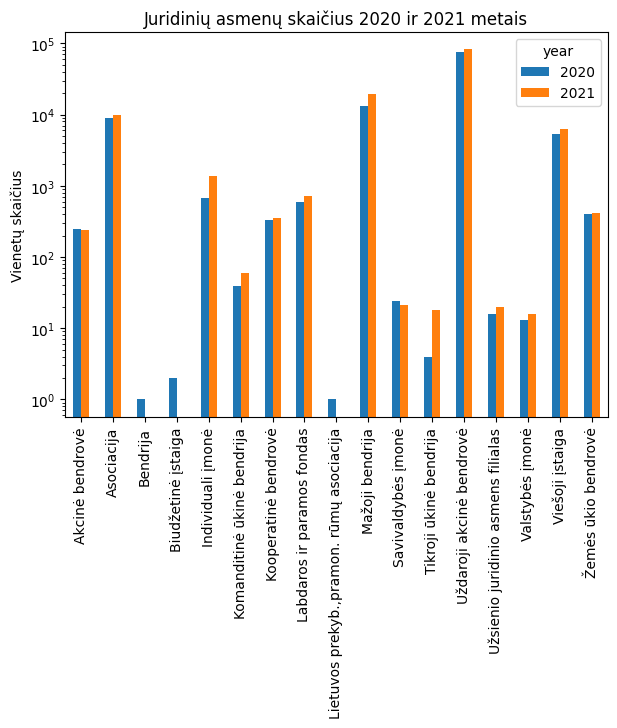

<IPython.core.display.Javascript object>

In [36]:
# Matplotlib

fig, axes = plt.subplots(1, 1, figsize=(7, 5))

df_for_plot.plot.bar(ax=axes, title="Juridinių asmenų skaičius 2020 ir 2021 metais")
plt.xlabel("")
plt.ylabel("Vienetų skaičius")
plt.yscale("log")

<AxesSubplot: title={'center': 'Juridinių asmenų skaičius 2020 ir 2021 metais'}, xlabel=' ', ylabel='Vienetų skaičius'>

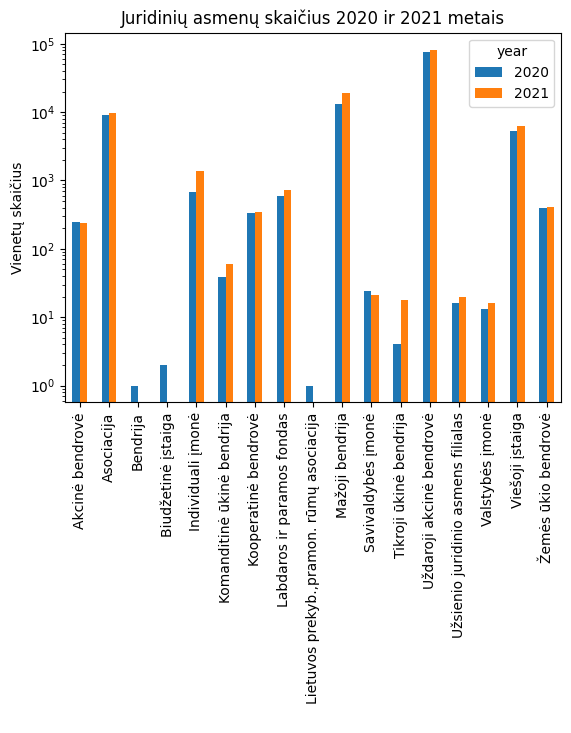

<IPython.core.display.Javascript object>

In [37]:
# Pandas plot

df_for_plot.plot(
    kind="bar",
    logy=True,
    xlabel=" ",
    ylabel="Vienetų skaičius",
    title="Juridinių asmenų skaičius 2020 ir 2021 metais",
)

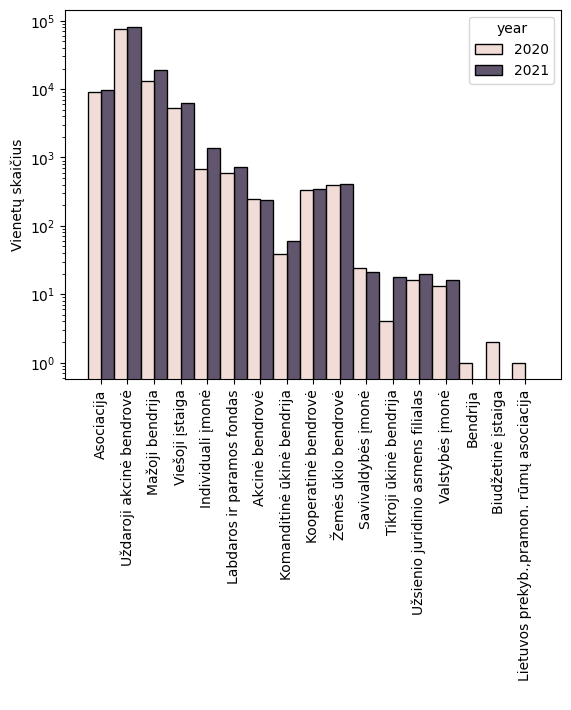

<IPython.core.display.Javascript object>

In [38]:
# Seaborn

ax = sns.histplot(
    blns_merged, x="form_pav", hue="year", multiple="dodge", log_scale=(False, True)
)

ax.set(xlabel=" ", ylabel="Vienetų skaičius")
plt.xticks(rotation=90)
plt.show()

## Kurį mėnesį buvo įregistruota daugiausiai juridinių asmenų 2020 ir 2021 metais? Atvaizduokite stulpelinę diagramą. [0.4 taško]

In [39]:
# Add column by month

blns_merged["month"] = pd.to_datetime(blns_merged["reg_date"]).dt.month

<IPython.core.display.Javascript object>

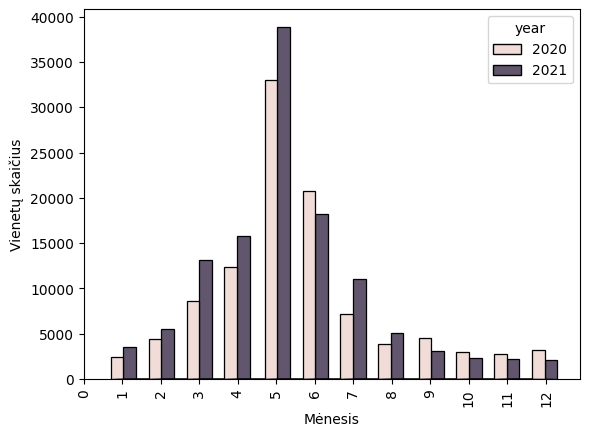

<IPython.core.display.Javascript object>

In [40]:
ax = sns.histplot(blns_merged, x="month", hue="year", multiple="dodge", shrink=10)

ax.set(xlabel="Mėnesis", ylabel="Vienetų skaičius")
plt.xticks(range(13), rotation=90)
plt.show()

## Vizualiai atvaizduoti juridinių asmenų statuso pasiskirstymą kiekvienais metais. [0.4 taško]

In [42]:
df_for_plot_2 = blns_merged.groupby(["stat_pav", "year"])["stat_pav"].count().to_frame()

<IPython.core.display.Javascript object>

In [43]:
df_for_plot_2.columns = range(df_for_plot_2.shape[1])

<IPython.core.display.Javascript object>

In [44]:
df_for_plot_2 = df_for_plot_2.reset_index().pivot_table(
    index=["stat_pav"], columns=["year"], values=0
)

<IPython.core.display.Javascript object>

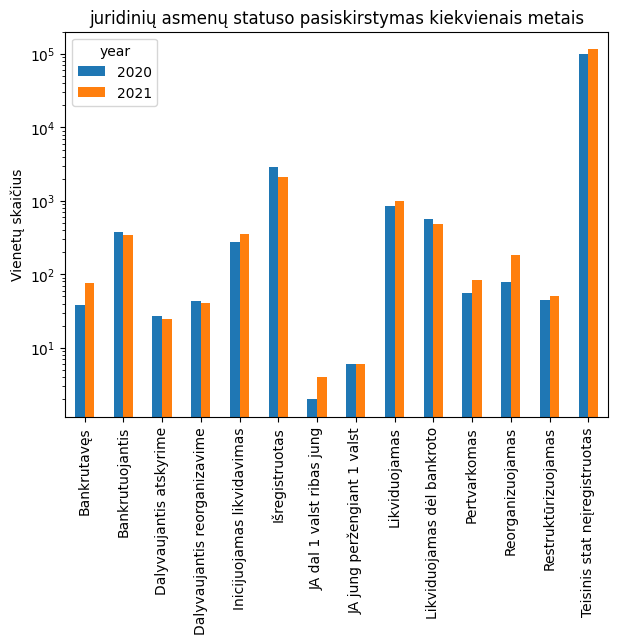

<IPython.core.display.Javascript object>

In [45]:
# Matplotlib

fig, axes = plt.subplots(1, 1, figsize=(7, 5))

df_for_plot_2.plot.bar(
    ax=axes, title="juridinių asmenų statuso pasiskirstymas kiekvienais metais"
)
plt.xlabel("")
plt.ylabel("Vienetų skaičius")
plt.yscale("log")

## Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis stulpelinėje diagramoje. [0.4 taško]

In [46]:
# Merge dataframe by year

merged_df_by_year_2021 = pd.merge(
    left=df_blns_2021,
    right=df_plna_2021,
    how="left",
    left_on=["obj_kodas", "obj_pav"],
    right_on=["obj_kodas", "obj_pav"],
)
merged_df_by_year_2020 = pd.merge(
    left=df_blns_2020,
    right=df_plna_2020,
    how="left",
    left_on=["obj_kodas", "obj_pav"],
    right_on=["obj_kodas", "obj_pav"],
)

<IPython.core.display.Javascript object>

In [47]:
# Filter only needed columns

merged_df_by_year_2021 = merged_df_by_year_2021[
    ["obj_kodas", "obj_pav", "nuosavas_kapitalas", "grynasis_pelnas"]
]
merged_df_by_year_2020 = merged_df_by_year_2020[
    ["obj_kodas", "obj_pav", "nuosavas_kapitalas", "grynasis_pelnas"]
]

<IPython.core.display.Javascript object>

In [48]:
# Count yearly trend

merged_df_by_year_2021["metu_tendencija"] = (
    merged_df_by_year_2021["nuosavas_kapitalas"]
    + merged_df_by_year_2021["grynasis_pelnas"]
)
merged_df_by_year_2020["metu_tendencija"] = (
    merged_df_by_year_2020["nuosavas_kapitalas"]
    + merged_df_by_year_2020["grynasis_pelnas"]
)

<IPython.core.display.Javascript object>

In [50]:
# Merge both yearly dataframes

full_df_yearly = pd.merge(
    left=merged_df_by_year_2021,
    right=merged_df_by_year_2020,
    how="left",
    left_on=["obj_kodas", "obj_pav"],
    right_on=["obj_kodas", "obj_pav"],
)

<IPython.core.display.Javascript object>

In [51]:
# Rename column names

full_df_yearly = full_df_yearly.rename(
    columns={
        "nuosavas_kapitalas_x": "nuosavas_kapitalas_2021",
        "grynasis_pelnas_x": "grynasis_pelnas_2021",
        "metu_tendencija_x": "metu_tendencija_2021",
        "nuosavas_kapitalas_y": "nuosavas_kapitalas_2020",
        "grynasis_pelnas_y": "grynasis_pelnas_2020",
        "metu_tendencija_y": "metu_tendencija_2020",
    }
)

<IPython.core.display.Javascript object>

In [52]:
# Count trend difference between years, and covert to boolean value


def tend(x):
    if x > 0:
        return True
    else:
        return False


full_df_yearly["tendencija"] = (
    full_df_yearly["metu_tendencija_2021"] - full_df_yearly["metu_tendencija_2020"]
)
full_df_yearly["tendencija_bool"] = full_df_yearly["tendencija"].apply(tend)

<IPython.core.display.Javascript object>

In [53]:
# Value counts

full_df_yearly["tendencija_bool"].value_counts()

False    141747
True      59334
Name: tendencija_bool, dtype: int64

<IPython.core.display.Javascript object>

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


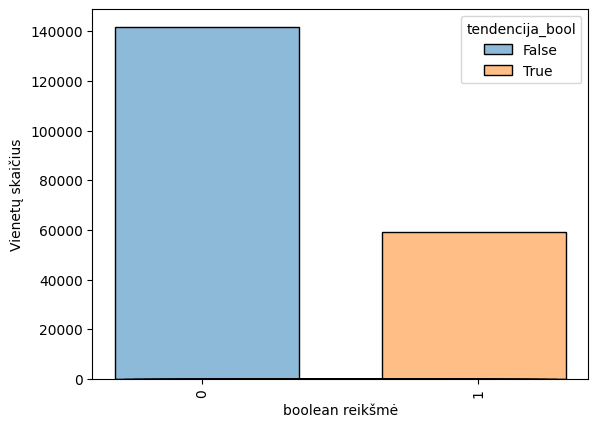

<IPython.core.display.Javascript object>

In [54]:
# Seaborn Boolean histplot

ax = sns.histplot(full_df_yearly, x="tendencija_bool", hue="tendencija_bool", shrink=20)

ax.set(xlabel="boolean reikšmė", ylabel="Vienetų skaičius")
plt.xticks(range(2), rotation=90)
plt.show()

## Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Toliau veiklą vykdanti įmonė pažymėta "Teisinis stat neįregistruotas" statusu. Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis. [0.4 taško]

In [55]:
# Filter for bancrupting companies

status = [
    "Bankrutavęs",
    "Bankrutuojantis",
    "Išregistruotas",
    "Inicijuojamas likvidavimas",
    "Likviduojamas",
    "Likviduojamas dėl bankroto",
]

form = ["Uždaroji akcinė bendrovė", "Mažoji bendrija"]

<IPython.core.display.Javascript object>

In [57]:
df_of_2021.columns

Index(['obj_kodas', 'obj_pav_x', 'form_kodas_x', 'form_pav_x',
       'stat_statusas_x', 'stat_pav_x', 'template_id_x', 'template_name_x',
       'standard_id_x', 'standard_name_x', 'laikotarpis_nuo_x',
       'laikotarpis_iki_x', 'reg_date_x', 'nuosavas_kapitalas',
       'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas',
       'trumpalaikis_turtas', 'formavimo_data_x', 'obj_pav_y', 'form_kodas_y',
       'form_pav_y', 'stat_statusas_y', 'stat_pav_y', 'template_id_y',
       'template_name_y', 'standard_id_y', 'standard_name_y',
       'laikotarpis_nuo_y', 'laikotarpis_iki_y', 'reg_date_y',
       'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos',
       'formavimo_data_y'],
      dtype='object')

<IPython.core.display.Javascript object>

In [58]:
merged_2021_filtered = df_of_2021[
    df_of_2021["stat_pav_x"].isin(status) & df_of_2021["form_pav_x"].isin(form)
]

<IPython.core.display.Javascript object>

In [60]:
merged_2021_filtered = merged_2021_filtered.groupby(["obj_kodas", "obj_pav_x"])[
    "nuosavas_kapitalas", "grynasis_pelnas"
].mean()

C:\Users\lrsko\AppData\Local\Temp\ipykernel_22616\1273328000.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_2021_filtered = merged_2021_filtered.groupby(["obj_kodas", "obj_pav_x"])[


<IPython.core.display.Javascript object>

In [61]:
merged_2020_grouped = df_of_2020.groupby(["obj_kodas", "obj_pav_x"])[
    "nuosavas_kapitalas", "grynasis_pelnas"
].mean()

C:\Users\lrsko\AppData\Local\Temp\ipykernel_22616\3038476311.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_2020_grouped = df_of_2020.groupby(["obj_kodas", "obj_pav_x"])[


<IPython.core.display.Javascript object>

In [62]:
bancrupting_companies_2021 = pd.merge(
    merged_2021_filtered, merged_2020_grouped, left_index=True, right_index=True
)

<IPython.core.display.Javascript object>

In [63]:
# Bankrutuojančių kompanijų nuosavo kapitalo suma 2021:

bancrupting_companies_2021["nuosavas_kapitalas_x"].sum()

471773811.5

<IPython.core.display.Javascript object>

In [64]:
# Bankrutuojančių kompanijų grynojo pelno suma 2021:

bancrupting_companies_2021["grynasis_pelnas_x"].sum()

-97825933.58333333

<IPython.core.display.Javascript object>

In [66]:
working_companies_2021 = df_of_2021[
    df_of_2021["stat_pav_x"] == "Teisinis stat neįregistruotas"
]

<IPython.core.display.Javascript object>

In [67]:
# Sėkmingai dirbančių kompanijų nuosavo kapitalo suma 2021:

working_companies_2021["nuosavas_kapitalas"].sum()

74313931717.0

<IPython.core.display.Javascript object>

In [68]:
# Sėkmingai dirbančių kompanijų grynojo pelno suma 2021:

working_companies_2021["grynasis_pelnas"].sum()

6359199378.0

<IPython.core.display.Javascript object>

Sėkmingai dirbančių įmonių nuosavas kapitalas didesnis n kartų. Pelnas taip pat, bankrutuojančių įmonių saraše pelnas yra neigiamas (kas yra logiška).

## Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas” [0.4 taško].

In [69]:
df_blns_2021["turtas"] = (
    df_blns_2021["ilgalaikis_turtas"] + df_blns_2021["trumpalaikis_turtas"]
)
df_blns_2020["turtas"] = (
    df_blns_2020["ilgalaikis_turtas"] + df_blns_2020["trumpalaikis_turtas"]
)

<IPython.core.display.Javascript object>

### Suskirstyti įmones į 5 grupes pagal lauką “turtas”

In [70]:
df_blns_2021["turto_grupe"] = pd.cut(
    df_blns_2021["turtas"],
    [0, 3000, 20000, 35000, 70000, 100000000000000000000000],
    labels=["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k +"],
)

<IPython.core.display.Javascript object>

In [71]:
df_blns_2020["turto_grupe"] = pd.cut(
    df_blns_2020["turtas"],
    [0, 3000, 20000, 35000, 70000, 100000000000000000000000],
    labels=["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k +"],
)

<IPython.core.display.Javascript object>

### Palyginti kaip šios grupės keičiasi 2020 ir 2021 metais. Palyginimą atvaizduoti skrituline diagrama ir gauti tokį patį kaip apačioje pavaizduotas paveikslas (skaitinės reikšmės gali skirtis):

#### naudojantis matplotlib funkcionalumu.

In [72]:
plot_2021 = df_blns_2021.groupby("turto_grupe")["stat_pav"].count().to_frame()

<IPython.core.display.Javascript object>

In [73]:
plot_2020 = df_blns_2020.groupby("turto_grupe")["stat_pav"].count().to_frame()

<IPython.core.display.Javascript object>

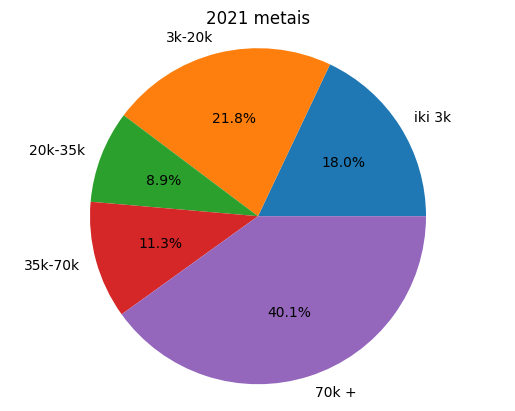

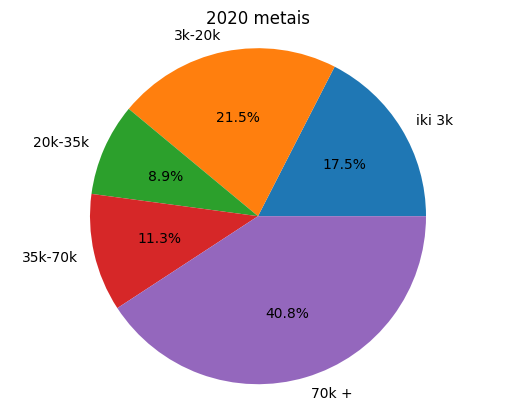

<IPython.core.display.Javascript object>

In [74]:
# Matplotlib
labels = ["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k +"]

plt.pie(plot_2021["stat_pav"], autopct="%1.1f%%", labels=labels)
labels = labels
plt.title("2021 metais")
plt.axis("equal")
plt.show()

plt.pie(plot_2020["stat_pav"], autopct="%1.1f%%", labels=labels)
plt.title("2020 metais")
plt.axis("equal")
plt.show()

#### naudojantis pandas funkcionalumu.

<AxesSubplot: ylabel='stat_pav'>

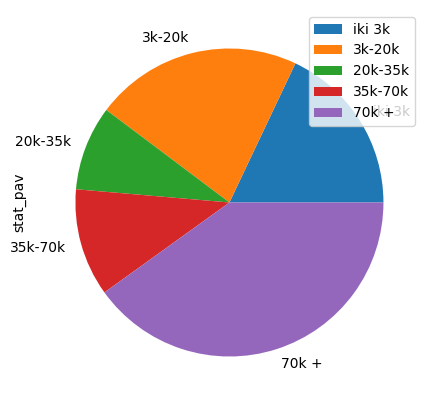

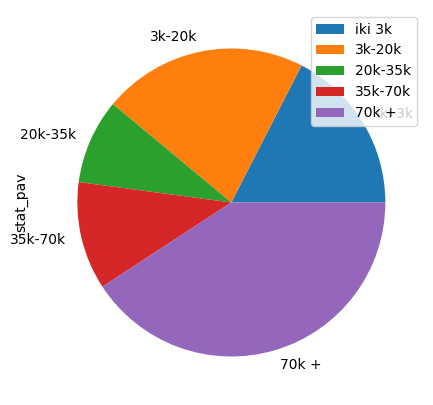

<IPython.core.display.Javascript object>

In [75]:
# Pandas

plot_2021.plot.pie(y="stat_pav", figsize=(5, 5))
plot_2020.plot.pie(y="stat_pav", figsize=(5, 5))

## Rasti TOP-100 pelningiausių įmonių pagal “grynasis pelnas” ir TOP-100 įmonių kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose? Skaičiuojant TOP įmonės įtraukti viso laikotarpio įmones (naudoti 2020 ir 2021 metų duomenis kartu). [0.4 taško]

In [76]:
kapitalas_top_100 = (
    full_df.groupby(["obj_pav", "obj_kodas"])["nuosavas_kapitalas"]
    .sum()
    .sort_values(ascending=False)[0:100]
    .to_frame()
)

<IPython.core.display.Javascript object>

In [77]:
pelnas_top_100 = (
    full_df.groupby(["obj_pav", "obj_kodas"])["grynasis_pelnas"]
    .sum()
    .sort_values(ascending=False)[0:100]
    .to_frame()
)

<IPython.core.display.Javascript object>

In [78]:
len(pd.merge(kapitalas_top_100, pelnas_top_100, left_index=True, right_index=True))

40

<IPython.core.display.Javascript object>

Top 100 Kapitalo ir Top 100 Pelno duomenyse sutampa 40 įmonių.

## Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020 ir 2021 metais? Kurios įmonės iškrenta iš TOP sąrašo 2021 metais? [0.4 taško]

In [80]:
pelnas_top_100_2021 = (
    df_of_2021.groupby(["obj_pav_x", "obj_kodas"])["grynasis_pelnas"]
    .sum()
    .sort_values(ascending=False)[0:100]
    .to_frame()
)

<IPython.core.display.Javascript object>

In [81]:
pelnas_top_100_2020 = (
    df_of_2020.groupby(["obj_pav_x", "obj_kodas"])["grynasis_pelnas"]
    .sum()
    .sort_values(ascending=False)[0:100]
    .to_frame()
)

<IPython.core.display.Javascript object>

In [82]:
len(
    pd.merge(
        pelnas_top_100_2021, pelnas_top_100_2020, left_index=True, right_index=True
    )
)

53

<IPython.core.display.Javascript object>

53 įmonės pagal pelną patenka į Top_100 ir 2021 ir 2020 m.

In [83]:
pelnas_top_10_2021 = (
    df_of_2021.groupby(["obj_pav_x", "obj_kodas"])["grynasis_pelnas"]
    .sum()
    .sort_values(ascending=False)[0:10]
    .to_frame()
)

<IPython.core.display.Javascript object>

In [84]:
pelnas_top_10_2020 = (
    df_of_2020.groupby(["obj_pav_x", "obj_kodas"])["grynasis_pelnas"]
    .sum()
    .sort_values(ascending=False)[0:10]
    .to_frame()
)

<IPython.core.display.Javascript object>

In [85]:
pd.merge(pelnas_top_10_2021, pelnas_top_10_2020, left_index=True, right_index=True)

,,grynasis_pelnas_x,grynasis_pelnas_y
obj_pav_x,obj_kodas,,
"UAB ""Thermo Fisher Scientific Baltics""",122351387,405474058.0,246597137.0
MAXIMA LT UAB,123033512,219700000.0,83641000.0
"UAB ""TELE2""",111471645,64809000.0,56625000.0
"UAB ""ME investicija""",302489393,59597076.0,65718272.0
Telia Lietuva AB,121215434,55914000.0,54889000.0


<IPython.core.display.Javascript object>

5 įmonės pagal pelną patenka į Top_10 ir 2021 ir 2020 m.

# Trečia dalis

Jūs norite įsigyti labai mažą arba mažą įmonę.

## Jums prieinamą finansinę informaciją papildykite (https://atvira.sodra.lt/imones/rinkiniai/index.html)
    a. darbuotojų skaičiumi (2020, 2021 metais)
    b. atlyginimų istoriją.
    c. veiklos sritimi.

In [87]:
monthly_2020 = pd.read_csv("monthly-2020.csv", sep=";")
monthly_2019 = pd.read_csv("monthly-2019.csv", sep=";")

<IPython.core.display.Javascript object>

In [88]:
# Filter needed columns

monthly_2019 = monthly_2019[
    [
        "Juridinių asmenų registro kodas (jarCode)",
        "Pavadinimas (name)",
        "Vidutinis darbo užmokestis (avgWage)",
        "Ekonominės veiklos rūšies pavadinimas(ecoActName)",
        "Apdraustųjų skaičius (numInsured)",
        "Ekonominės veiklos rūšies kodas(ecoActCode)",
        "Savivaldybė, kurioje registruota(municipality)",
    ]
]
monthly_2020 = monthly_2020[
    [
        "Juridinių asmenų registro kodas (jarCode)",
        "Pavadinimas (name)",
        "Vidutinis darbo užmokestis (avgWage)",
        "Ekonominės veiklos rūšies pavadinimas(ecoActName)",
        "Apdraustųjų skaičius (numInsured)",
        "Ekonominės veiklos rūšies kodas(ecoActCode)",
        "Savivaldybė, kurioje registruota(municipality)",
    ]
]

<IPython.core.display.Javascript object>

In [89]:
# Count avg of salary from monthly data:

monthly_2019 = (
    monthly_2019.groupby(["Juridinių asmenų registro kodas (jarCode)"])
    .agg(
        {
            "Vidutinis darbo užmokestis (avgWage)": "mean",
            "Ekonominės veiklos rūšies pavadinimas(ecoActName)": "first",
            "Apdraustųjų skaičius (numInsured)": "last",
            "Ekonominės veiklos rūšies kodas(ecoActCode)": "last",
            "Savivaldybė, kurioje registruota(municipality)": "last",
        }
    )
    .reset_index()
)

monthly_2020 = (
    monthly_2020.groupby(["Juridinių asmenų registro kodas (jarCode)"])
    .agg(
        {
            "Vidutinis darbo užmokestis (avgWage)": "mean",
            "Ekonominės veiklos rūšies pavadinimas(ecoActName)": "first",
            "Apdraustųjų skaičius (numInsured)": "last",
            "Ekonominės veiklos rūšies kodas(ecoActCode)": "last",
            "Savivaldybė, kurioje registruota(municipality)": "last",
        }
    )
    .reset_index()
)

<IPython.core.display.Javascript object>

In [90]:
# Add new columns to dataframes

df_of_2020_su_sodra = df_of_2020.merge(
    monthly_2019,
    how="inner",
    left_on="obj_kodas",
    right_on="Juridinių asmenų registro kodas (jarCode)",
    left_index=False,
    right_index=False,
)

df_of_2021_su_sodra = df_of_2021.merge(
    monthly_2020,
    how="inner",
    left_on="obj_kodas",
    right_on="Juridinių asmenų registro kodas (jarCode)",
    left_index=False,
    right_index=False,
)

<IPython.core.display.Javascript object>

## Galutinis duomenų masyvas turi atrodyti kaip 3_uzduotis_data_sample.csv. [0.5 taško]

### Svarbu atkreipti dėmesį į finasinių duomenų ir sodros duomenų datas ir galimus prasilenkimus. Rekomeduojam vidutinį darbuotojų skaičių imti finansinių metų paskutinį mėnesį.

In [93]:
column_names = [
    "obj_kodas",
    "obj_pav",
    "form_pav",
    "veiklos_kodas",
    "veiklos_aprasymas",
    "savivaldybe",
    "nuosavas_kapitalas_20",
    "mok_sumos_ir_isipareigojimai_20",
    "ilgalaikis_turtas_20",
    "trumpalaikis_turtas_20",
    "pardavimo_pajamos_20",
    "grynasis_pelnas_20",
    "vid_atlyginimas_20",
    "darbuotoju_skaicius_20",
    "nuosavas_kapitalas_21",
    "mok_sumos_ir_isipareigojimai_21",
    "ilgalaikis_turtas_21",
    "trumpalaikis_turtas_21",
    "pardavimo_pajamos_21",
    "grynasis_pelnas_21",
    "vid_atlyginimas_21",
    "darbuotoju_skaicius_21",
]


<IPython.core.display.Javascript object>

In [94]:
# Create full dataframe with additional info

full_df_su_sodra = df_of_2021_su_sodra.merge(
    df_of_2020_su_sodra,
    how="inner",
    left_on="obj_kodas",
    right_on="obj_kodas",
    left_index=False,
    right_index=False,
)

<IPython.core.display.Javascript object>

In [96]:
full_df_su_sodra.columns

Index(['obj_kodas', 'obj_pav_x_x', 'form_kodas_x_x', 'form_pav_x_x',
       'stat_statusas_x_x', 'stat_pav_x_x', 'template_id_x_x',
       'template_name_x_x', 'standard_id_x_x', 'standard_name_x_x',
       'laikotarpis_nuo_x_x', 'laikotarpis_iki_x_x', 'reg_date_x_x',
       'nuosavas_kapitalas_x', 'mok_sumos_ir_isipareigojimai_x',
       'ilgalaikis_turtas_x', 'trumpalaikis_turtas_x', 'formavimo_data_x_x',
       'obj_pav_y_x', 'form_kodas_y_x', 'form_pav_y_x', 'stat_statusas_y_x',
       'stat_pav_y_x', 'template_id_y_x', 'template_name_y_x',
       'standard_id_y_x', 'standard_name_y_x', 'laikotarpis_nuo_y_x',
       'laikotarpis_iki_y_x', 'reg_date_y_x', 'pelnas_pries_apmokestinima_x',
       'grynasis_pelnas_x', 'pardavimo_pajamos_x', 'formavimo_data_y_x',
       'Juridinių asmenų registro kodas (jarCode)_x',
       'Vidutinis darbo užmokestis (avgWage)_x',
       'Ekonominės veiklos rūšies pavadinimas(ecoActName)_x',
       'Apdraustųjų skaičius (numInsured)_x',
       'Ekonominė

<IPython.core.display.Javascript object>

In [97]:
# Filter only needed columns

full_df_su_sodra = full_df_su_sodra[
    [
        "obj_kodas",
        "obj_pav_x_x",
        "form_pav_x_x",
        "Ekonominės veiklos rūšies kodas(ecoActCode)_x",
        "Ekonominės veiklos rūšies pavadinimas(ecoActName)_x",
        "Savivaldybė, kurioje registruota(municipality)_x",
        "nuosavas_kapitalas_y",
        "mok_sumos_ir_isipareigojimai_y",
        "ilgalaikis_turtas_y",
        "trumpalaikis_turtas_y",
        "pardavimo_pajamos_y",
        "grynasis_pelnas_y",
        "Vidutinis darbo užmokestis (avgWage)_y",
        "Apdraustųjų skaičius (numInsured)_y",
        "nuosavas_kapitalas_x",
        "mok_sumos_ir_isipareigojimai_x",
        "ilgalaikis_turtas_x",
        "pardavimo_pajamos_x",
        "trumpalaikis_turtas_x",
        "grynasis_pelnas_x",
        "Vidutinis darbo užmokestis (avgWage)_x",
        "Apdraustųjų skaičius (numInsured)_x",
    ]
]

<IPython.core.display.Javascript object>

In [98]:
# Rename column names

full_df_su_sodra.columns = column_names

<IPython.core.display.Javascript object>

## Išsiaiškinkite micro ir mažos įmonės apibrėžimą.

Maža įmonė – įmonė, kurioje dirba mažiau kaip 50 darbuotojų ir kurios finansiniai duomenys atitinka bent vieną iš šių sąlygų:
 - įmonės metinės pajamos neviršija 10 mln. eurų;
 - įmonės balanse nurodyto turto vertė neviršija 10 mln. eurų.

Labai maža įmonė (micro) – įmonė, kurioje dirba mažiau kaip 10 darbuotojų ir kurios finansiniai duomenys atitinka bent vieną iš šių sąlygų:
 - įmonės metinės pajamos neviršija 2 mln. eurų;
 - įmonės balanse nurodyto turto vertė neviršija 2 mln. eurų.

In [102]:
df_of_2021_su_sodra["turtas"] = (
    df_of_2021_su_sodra["trumpalaikis_turtas"]
    + df_of_2021_su_sodra["ilgalaikis_turtas"]
)
# df_of_2021_su_sodra.info()

<IPython.core.display.Javascript object>

In [104]:
df_of_2020_su_sodra["turtas"] = (
    df_of_2020_su_sodra["trumpalaikis_turtas"]
    + df_of_2020_su_sodra["ilgalaikis_turtas"]
)
# df_of_2020_su_sodra.info()

<IPython.core.display.Javascript object>

In [106]:
form_pav = ["Uždaroji akcinė bendrovė", "Mažoji bendrija"]

filt_df_of_2021_su_sodra = df_of_2021_su_sodra[
    df_of_2021_su_sodra["form_pav_x"].isin(form_pav)
]
filt_df_of_2020_su_sodra = df_of_2020_su_sodra[
    df_of_2020_su_sodra["form_pav_x"].isin(form_pav)
]

<IPython.core.display.Javascript object>

In [113]:
# Atrinkti mažas įmones:

darb_sk = 50
met_pajam = 10000000
turt_vert = 10000000

mazos_imones_df_2021 = df_of_2021_su_sodra[
    (df_of_2021_su_sodra["Apdraustųjų skaičius (numInsured)"] < darb_sk)
    & (df_of_2021_su_sodra["pardavimo_pajamos"] < met_pajam)
    & (df_of_2021_su_sodra["turtas"] < met_pajam)
]

mazos_imones_df_2020 = df_of_2020_su_sodra[
    (df_of_2020_su_sodra["Apdraustųjų skaičius (numInsured)"] < darb_sk)
    & (df_of_2020_su_sodra["pardavimo_pajamos"] < met_pajam)
    & (df_of_2020_su_sodra["turtas"] < met_pajam)
]

mazos_imones_df_2021.sample(5)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,...,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y,Juridinių asmenų registro kodas (jarCode),Vidutinis darbo užmokestis (avgWage),Ekonominės veiklos rūšies pavadinimas(ecoActName),Apdraustųjų skaičius (numInsured),Ekonominės veiklos rūšies kodas(ecoActCode),"Savivaldybė, kurioje registruota(municipality)",turtas
51254,305644920,UAB Redrola,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,-957.0,31443.0,2022-12-01,305644920.0,NaN,Variklinių transporto priemonių ir motociklų d...,2,450000.0,Kauno m. sav.,74492.0
18391,157585318,"Uždaroji akcinė bendrovė ""GRASA""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,7859.0,146965.0,2022-12-01,157585318.0,360.3100,Mažmeninė prekyba nespecializuotose parduotuvėse,3,471000.0,Joniškio r. sav.,14275.0
17085,302308359,"UAB ""DynamicsWay""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,42500.0,109047.0,2022-12-01,302308359.0,NaN,Kita informacinių technologijų ir kompiuterių ...,2,620900.0,Šalčininkų r. sav.,203038.0
82322,302531180,"UAB ""Transverta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,7533.0,48555.0,2022-12-01,302531180.0,NaN,"Apskaitos, buhalterijos ir audito veikla; kons...",2,692000.0,Rietavo sav.,18095.0
23509,304298878,"UAB ""Melada""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,10888.0,146994.0,2022-12-01,304298878.0,505.2675,Medienos pjaustymas ir obliavimas,6,161000.0,Kauno r. sav.,157081.0


<IPython.core.display.Javascript object>

In [114]:
# Atrinkti macro įmones:

darb_sk = 10
met_pajam = 2000000
turt_vert = 2000000

macro_imones_df_2021 = df_of_2021_su_sodra[
    (df_of_2021_su_sodra["Apdraustųjų skaičius (numInsured)"] < darb_sk)
    & (df_of_2021_su_sodra["pardavimo_pajamos"] < met_pajam)
    & (df_of_2021_su_sodra["turtas"] < met_pajam)
]

macro_imones_df_2020 = df_of_2020_su_sodra[
    (df_of_2020_su_sodra["Apdraustųjų skaičius (numInsured)"] < darb_sk)
    & (df_of_2020_su_sodra["pardavimo_pajamos"] < met_pajam)
    & (df_of_2020_su_sodra["turtas"] < met_pajam)
]

macro_imones_df_2021.sample(5)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,...,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y,Juridinių asmenų registro kodas (jarCode),Vidutinis darbo užmokestis (avgWage),Ekonominės veiklos rūšies pavadinimas(ecoActName),Apdraustųjų skaičius (numInsured),Ekonominės veiklos rūšies kodas(ecoActCode),"Savivaldybė, kurioje registruota(municipality)",turtas
76456,305431961,"UAB ""Speciali technika""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,674.0,27465.0,2022-12-01,305431961.0,NaN,Krovininis kelių transportas,1,494100.0,Klaipėdos m. sav.,35010.0
33922,305209537,"UAB ""Rodoteka""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,9165.0,87169.0,2022-12-01,305209537.0,556.180000,Ortopedinių ir kitokių įtaisų gamyba,3,325020.0,Kauno m. sav.,86842.0
97980,303195925,"UAB ""Licitus""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,-14692.0,27700.0,2022-12-01,303195925.0,NaN,Kita mažmeninė prekyba nespecializuotose pardu...,1,471900.0,Vilniaus m. sav.,0.0
43411,163332547,"UAB ""Ančiuvis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,16217.0,115083.0,2022-12-01,163332547.0,480.009167,Sporto įrangos mažmeninė prekyba specializuoto...,6,476400.0,Klaipėdos r. sav.,211566.0
88466,303517002,"UAB ""Žaidenta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,6687.0,8750.0,2022-12-01,303517002.0,NaN,"Medicinos ir odontologijos prietaisų, instrume...",1,325000.0,Vilniaus m. sav.,10625.0


<IPython.core.display.Javascript object>

### Indentifikuokite labiausiai augusias įmones. [1 taškas]

In [115]:
# labiausiai augusios macro imones:

macro_imones_df_2021.columns

Index(['obj_kodas', 'obj_pav_x', 'form_kodas_x', 'form_pav_x',
       'stat_statusas_x', 'stat_pav_x', 'template_id_x', 'template_name_x',
       'standard_id_x', 'standard_name_x', 'laikotarpis_nuo_x',
       'laikotarpis_iki_x', 'reg_date_x', 'nuosavas_kapitalas',
       'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas',
       'trumpalaikis_turtas', 'formavimo_data_x', 'obj_pav_y', 'form_kodas_y',
       'form_pav_y', 'stat_statusas_y', 'stat_pav_y', 'template_id_y',
       'template_name_y', 'standard_id_y', 'standard_name_y',
       'laikotarpis_nuo_y', 'laikotarpis_iki_y', 'reg_date_y',
       'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos',
       'formavimo_data_y', 'Juridinių asmenų registro kodas (jarCode)',
       'Vidutinis darbo užmokestis (avgWage)',
       'Ekonominės veiklos rūšies pavadinimas(ecoActName)',
       'Apdraustųjų skaičius (numInsured)',
       'Ekonominės veiklos rūšies kodas(ecoActCode)',
       'Savivaldybė, kurioje registruota(mun

<IPython.core.display.Javascript object>

In [126]:
# Filter needed columns:

column_names_3 = [
    "obj_kodas",
    "obj_pav",
    "grynasis_pelnas",
    "pardavimo_pajamos",
    "vid_atlyginimas",
    "darbuotoju_skaicius",
]

macro_imones_df_2021_filtered = macro_imones_df_2021[
    [
        "obj_kodas",
        "obj_pav_x",
        "grynasis_pelnas",
        "pardavimo_pajamos",
        "Vidutinis darbo užmokestis (avgWage)",
        "Apdraustųjų skaičius (numInsured)",
    ]
]
macro_imones_df_2020_filtered = macro_imones_df_2020[
    [
        "obj_kodas",
        "obj_pav_x",
        "grynasis_pelnas",
        "pardavimo_pajamos",
        "Vidutinis darbo užmokestis (avgWage)",
        "Apdraustųjų skaičius (numInsured)",
    ]
]
macro_imones_df_2021_filtered.columns = column_names_3
macro_imones_df_2020_filtered.columns = column_names_3

<IPython.core.display.Javascript object>

In [266]:
# Merge to one dataframe:

macro_full = macro_imones_df_2021_filtered.merge(
    macro_imones_df_2020_filtered,
    how="inner",
    left_on="obj_kodas",
    right_on="obj_kodas",
    left_index=False,
    right_index=False,
)

<IPython.core.display.Javascript object>

In [275]:
# Pašalinu neigiamas reikšmes (kad nerodytų nepelningai dirbančių įmonių):

macro_full = macro_full[
    (macro_full["pardavimo_pajamos_y"] > 10000)
    & (macro_full["pardavimo_pajamos_x"] > 10000)
    & (macro_full["grynasis_pelnas_x"] > 10000)
    & (macro_full["grynasis_pelnas_y"] > 10000)
    & (macro_full["darbuotoju_skaicius_x"] > 5)
    & (macro_full["darbuotoju_skaicius_y"] > 5)
]

<IPython.core.display.Javascript object>

In [276]:
# Sukuriu procentinius augimo stulpelius pelnui, pajamoms, darbuotojams

macro_full["pajamos_ptc"] = (
    (macro_full["pardavimo_pajamos_x"] - macro_full["pardavimo_pajamos_y"])
    / macro_full["pardavimo_pajamos_y"]
    * 100
)

macro_full["pelnas_ptc"] = (
    (macro_full["grynasis_pelnas_x"] - macro_full["grynasis_pelnas_y"])
    / macro_full["grynasis_pelnas_y"]
    * 100
)

macro_full["darbuotojai_ptc"] = (
    (macro_full["darbuotoju_skaicius_x"] - macro_full["darbuotoju_skaicius_y"])
    / macro_full["darbuotoju_skaicius_y"]
    * 100
)

<IPython.core.display.Javascript object>

In [277]:
# Labiausiai augusios įmonės pagal pelną pct:

macro_full[["obj_pav_x", "pelnas_ptc"]].sort_values(by="pelnas_ptc", ascending=False)[
    0:15
]

,obj_pav_x,pelnas_ptc
20748,"UAB ""Cessio""",1979.878429
37370,"UAB ""Tiksli forma""",1496.815858
41667,"UAB ""NORKĖ""",1405.810741
35741,"UAB ""Jurfa""",1368.967123
121,"Uždaroji akcinė bendrovė ""KORPORACIJA TJANŠI""",1341.124856
57341,"ŽŪB ""Savarina""",1044.137142
15499,"UAB ""Linkona""",979.188989
14058,AL-KO Technology Lithuania UAB,851.184505
37601,"Uždaroji akcinė bendrovė ""SOLISUN BALTIC""",707.254426
31898,"UAB ""Žaidimų aikštelių įranga""",703.853773


<IPython.core.display.Javascript object>

In [278]:
# Labiausiai augusios įmonės pagal pajamas pct:

macro_full[["obj_pav_x", "pajamos_ptc"]].sort_values(by="pajamos_ptc", ascending=False)[
    0:15
]

,obj_pav_x,pajamos_ptc
29409,"UAB ""Ortopedijos paslaugos""",1498.874447
41667,"UAB ""NORKĖ""",664.514346
57750,"UAB ""Čeringa""",630.682129
25821,"""Starksida"" UAB",628.744025
47512,"UAB ""Zipis""",553.914148
47514,"UAB ""Zipis""",553.914148
20732,UAB AMBERMAGIC,502.276409
24770,"UAB ""Alkensta""",495.500240
15771,"UAB ""Avantus""",461.211708
23797,"UAB ""TJLT""",450.734838


<IPython.core.display.Javascript object>

In [279]:
# Labiausiai augusios įmonės pagal darbuotojų skaičių pct:

macro_full[["obj_pav_x", "darbuotojai_ptc"]].sort_values(
    by="darbuotojai_ptc", ascending=False
)[0:15]

,obj_pav_x,darbuotojai_ptc
23860,REMATRADE UAB,50.0
10981,"UAB ""RAKVA""",50.0
48489,"Uždaroji akcinė bendrovė ""Arnavita""",50.0
48770,"UAB ""Baltic foodis""",50.0
29935,"UAB ""Finansų ekspertai""",50.0
29934,"UAB ""Finansų ekspertai""",50.0
11558,"UAB ""Personalo paslaugos""",50.0
29933,"UAB ""Finansų ekspertai""",50.0
29932,"UAB ""Finansų ekspertai""",50.0
42717,"UAB ""Žemaitijos medis""",50.0


<IPython.core.display.Javascript object>

In [282]:
# Labiausiai augusi įmonė UAB "NORKĖ" nes papuola tiek pagal pelną, tiek pagal pajamas į geriausių penketuką.

<IPython.core.display.Javascript object>

In [ ]:
# labiausiai augusios mazos imones:

In [ ]:
mazos_imones_df_2021

In [283]:
column_names_3 = [
    "obj_kodas",
    "obj_pav",
    "grynasis_pelnas",
    "pardavimo_pajamos",
    "vid_atlyginimas",
    "darbuotoju_skaicius",
]

mazos_imones_df_2021_filtered = mazos_imones_df_2021[
    [
        "obj_kodas",
        "obj_pav_x",
        "grynasis_pelnas",
        "pardavimo_pajamos",
        "Vidutinis darbo užmokestis (avgWage)",
        "Apdraustųjų skaičius (numInsured)",
    ]
]
mazos_imones_df_2020_filtered = mazos_imones_df_2020[
    [
        "obj_kodas",
        "obj_pav_x",
        "grynasis_pelnas",
        "pardavimo_pajamos",
        "Vidutinis darbo užmokestis (avgWage)",
        "Apdraustųjų skaičius (numInsured)",
    ]
]
mazos_imones_df_2021_filtered.columns = column_names_3
mazos_imones_df_2020_filtered.columns = column_names_3

<IPython.core.display.Javascript object>

In [284]:
# Merge to one dataframe:

mazos_full = mazos_imones_df_2021_filtered.merge(
    mazos_imones_df_2020_filtered,
    how="inner",
    left_on="obj_kodas",
    right_on="obj_kodas",
    left_index=False,
    right_index=False,
)

<IPython.core.display.Javascript object>

In [285]:
# Pašalinu neigiamas reikšmes (kad nerodytų nepelningai dirbančių įmonių):

mazos_full = macro_full[
    (mazos_full["pardavimo_pajamos_y"] > 10000)
    & (mazos_full["pardavimo_pajamos_x"] > 10000)
    & (mazos_full["grynasis_pelnas_x"] > 10000)
    & (mazos_full["grynasis_pelnas_y"] > 10000)
    & (mazos_full["darbuotoju_skaicius_x"] > 5)
    & (mazos_full["darbuotoju_skaicius_y"] > 5)
]

C:\Users\lrsko\AppData\Local\Temp\ipykernel_22616\1406090791.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mazos_full = macro_full[


<IPython.core.display.Javascript object>

In [286]:
# Sukuriu procentinius augimo stulpelius pelnui, pajamoms, darbuotojams

mazos_full["pajamos_ptc"] = (
    (mazos_full["pardavimo_pajamos_x"] - mazos_full["pardavimo_pajamos_y"])
    / mazos_full["pardavimo_pajamos_y"]
    * 100
)

mazos_full["pelnas_ptc"] = (
    (mazos_full["grynasis_pelnas_x"] - mazos_full["grynasis_pelnas_y"])
    / mazos_full["grynasis_pelnas_y"]
    * 100
)

mazos_full["darbuotojai_ptc"] = (
    (mazos_full["darbuotoju_skaicius_x"] - mazos_full["darbuotoju_skaicius_y"])
    / mazos_full["darbuotoju_skaicius_y"]
    * 100
)

C:\Users\lrsko\AppData\Local\Temp\ipykernel_22616\3802568958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mazos_full["pajamos_ptc"] = (
C:\Users\lrsko\AppData\Local\Temp\ipykernel_22616\3802568958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mazos_full["pelnas_ptc"] = (
C:\Users\lrsko\AppData\Local\Temp\ipykernel_22616\3802568958.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<IPython.core.display.Javascript object>

In [287]:
# Labiausiai augusios įmonės pagal pelną pct:

mazos_full[["obj_pav_x", "pelnas_ptc"]].sort_values(by="pelnas_ptc", ascending=False)[
    0:15
]

,obj_pav_x,pelnas_ptc
9351,Virgilita UAB,659.102782
43051,"UAB ""Astrohn Technology""",613.798233
29168,"Uždaroji akcinė bendrovė ""OPS""",538.446097
39624,"UAB ""MES IR MŪRAS""",532.088819
53461,"UAB ""Stilartas""",411.482311
57750,"UAB ""Čeringa""",402.676242
57058,"UAB ""AILYA""",357.931034
42188,"UAB ""BOKER""",340.430465
24232,"UAB ""Vinlita""",320.076207
17640,UAB SAULONAS,283.198490


<IPython.core.display.Javascript object>

In [288]:
# Labiausiai augusios įmonės pagal pajamas pct:

mazos_full[["obj_pav_x", "pajamos_ptc"]].sort_values(by="pajamos_ptc", ascending=False)[
    0:15
]

,obj_pav_x,pajamos_ptc
57750,"UAB ""Čeringa""",630.682129
23805,"UAB ""TJLT""",450.734838
23803,"UAB ""TJLT""",450.734838
47517,"UAB ""Navis marina""",245.883671
39669,"UAB ""Kretingos miškas""",193.718565
57932,"UAB ""Jandas""",170.959653
9074,"UAB ""Vitacon LT""",166.861099
28739,"UAB ""Aitrena""",132.291667
51981,"UAB ""Rytų sveikata""",106.808875
23804,"UAB ""TJLT""",104.056476


<IPython.core.display.Javascript object>

In [289]:
# Labiausiai augusios įmonės pagal darbuotojų skaičių pct:

mazos_full[["obj_pav_x", "darbuotojai_ptc"]].sort_values(
    by="darbuotojai_ptc", ascending=False
)[0:15]

,obj_pav_x,darbuotojai_ptc
33471,UAB Unum design London,50.000000
42600,"UAB ""Everitas""",33.333333
51981,"UAB ""Rytų sveikata""",33.333333
23967,"UAB ""Aitransa""",33.333333
10802,"Uždaroji akcinė bendrovė ""DABALTA IR KO""",28.571429
39669,"UAB ""Kretingos miškas""",28.571429
29530,"Uždaroji akcinė bendrovė ""UOSTAMIESČIO PROJEKTAS""",28.571429
55699,UAB ARCHICOM,28.571429
56493,"Uždaroji akcinė bendrovė ""Acetilenas plius""",16.666667
11712,"UAB ""Kaladoka""",16.666667


<IPython.core.display.Javascript object>

In [ ]:
# Labiausiai augusios įmonės Virgilita UAB, UAB "Čeringa" ir UAB "Advis" nes papuola tiek pagal pelną, 
# tiek pagal pajamas į geriausių penkioliktuką.

In [290]:
!pip freeze > requirements.txt

<IPython.core.display.Javascript object>